# Session 15 - Dimensionality reduction

## Session agenda

1. How to measure feature’s importance. Feature selection.
2. Principal component analysis (PCA). Using PCA for dataset dimensionality reduction.

## Feature selection
In data analysis we want to extract features, that will allow us to perform different tasks, such as regression or classification. There is great freedom deting the process of feature extraction. Usually we want for the feature to carry some information about the objects we are analyzing.

This information usually comes from the statistical properties of the feature we are analyzing. Some of the typical properties:
1. Variance - features with low variance practically carry no information
2. Descriminatory power - is there any statistical difference in the feature values extracted from different classes of objects.

Since we are working with a collection of features, then some of the features can carry almost the same information. In this case we can have one group of features dominate other groups. Thus, bias is introduced in our descision-making procedures. Usually, features, which have high correlation or carry significant mutual information are filtered out.

1. https://en.wikipedia.org/wiki/Feature_selection
2. https://en.wikipedia.org/wiki/Correlation_and_dependence
3. https://en.wikipedia.org/wiki/Mutual_information

Automatically created module for IPython interactive environment


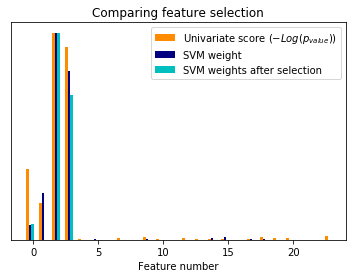

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

###############################################################################
# import some data to play with

# The iris dataset
iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

###############################################################################
plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

###############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')

###############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

## Principal component analysis
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Consider a data matrix, $X$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the n rows represents a different repetition of the experiment, and each of the p columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of $p$-dimensional vectors of weights or loadings  $\mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector  $\mathbf{x}_{(i)}$ of $X$ to a new vector of principal component scores $\mathbf {t} _{(i)}=(t_{1},\dots ,t_{m})_{(i)}$, given by

$$
{t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m
$$
in such a way that the individual variables of $\mathbf{t}$ considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each loading vector $\mathbf{w}$ constrained to be a unit vector.

### First component
The first loading vector $w_{(1)}$ thus has to satisfy $\mathbf{w}_{(1)}={\Vert \mathbf{w}\Vert =1}$

$$
\mathbf{w}_{(1)}
 = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{\arg\,max}}\,\left\{ \sum_i \left(t_1\right)^2_{(i)} \right\}
 = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{\arg\,max}}\,\left\{ \sum_i \left(\mathbf{x}_{(i)} \cdot \mathbf{w} \right)^2 \right\}
$$
Equivalently, writing this in matrix form gives

$$
\mathbf{w}_{(1)}
 = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{\arg\,max}}\, \{ \Vert \mathbf{Xw} \Vert^2 \}
 = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{\arg\,max}}\, \left\{ \mathbf{w}^T \mathbf{X}^T \mathbf{X w} \right\}
$$
Since $w_{(1)}$ has been defined to be a unit vector, it equivalently also satisfies
$$
\mathbf{w}_{(1)} = {\operatorname{\arg\,max}}\, \left\{ \frac{\mathbf{w}^T\mathbf{X}^T \mathbf{X w}}{\mathbf{w}^T \mathbf{w}} \right\}
$$
The quantity to be maximised can be recognised as a Rayleigh quotient. A standard result for a symmetric matrix such as $\mathbf{X}^{T}\mathbf{X}$ is that the quotient's maximum possible value is the largest eigenvalue of the matrix, which occurs when $w$ is the corresponding eigenvector.

With $\mathbf{w}_{(1)}$ found, the first component of a data vector $\mathbf{x}_{(i)}$ can then be given as a score $t_{1(i)} = \mathbf{x}_{(i)} ⋅ \mathbf{w}_{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, $\{\mathbf{x}_{(i)} ⋅ \mathbf{w}_{(1)}\} \mathbf{w}_{(1)}$.

### Further components
The $k$-th component can be found by subtracting the first $k − 1$ principal components from $\mathbf{X}$:
$$
\mathbf{\hat{X}}_{k} = \mathbf{X} - \sum_{s = 1}^{k - 1} \mathbf{X} \mathbf{w}_{(s)} \mathbf{w}_{(s)}^{\rm T}
$$
and then finding the loading vector which extracts the maximum variance from this new data matrix
$$
\mathbf{w}_{(k)} = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{arg\,max}} \left\{ \Vert \mathbf{\hat{X}}_{k} \mathbf{w} \Vert^2 \right\} = {\operatorname{\arg\,max}}\, \left\{ \tfrac{\mathbf{w}^T\mathbf{\hat{X}}_{k}^T \mathbf{\hat{X}}_{k} \mathbf{w}}{\mathbf{w}^T \mathbf{w}} \right\}
$$
It turns out that this gives the remaining eigenvectors of $\mathbf{X}^{T}\mathbf{X}$, with the maximum values for the quantity in brackets given by their corresponding eigenvalues. Thus the loading vectors are eigenvectors of $\mathbf{X}^{T}\mathbf{X}$.

The $k$-th component of a data vector $\mathbf{x}_{(i)}$ can therefore be given as a score $t_{k(i)} = \mathbf{x}_{(i)} ⋅ \mathbf{w}_{(k)}$ in the transformed co-ordinates, or as the corresponding vector in the space of the original variables, $\{\mathbf{x}_{(i)} ⋅ \mathbf{w}_{(k)}\} \mathbf{w}_{(k)}$, where $\mathbf{w}_{(k)}$ is the $k$-th eigenvector of $\mathbf{X}^{T}\mathbf{X}$.

The full principal components decomposition of $\mathbf{X}$ can therefore be given as
$$
\mathbf{T} = \mathbf{X} \mathbf{W}
$$
where $\mathbf{W}$ is a $p$-by-$p$ matrix whose columns are the eigenvectors of $\mathbf{X}^{T}\mathbf{X}$.

Automatically created module for IPython interactive environment
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[[-2.68420713  0.32660731 -0.02151184]
 [-2.71539062 -0.16955685 -0.20352143]
 [-2.88981954 -0.13734561  0.02470924]
 [-2.7464372  -0.31112432  0.03767198]
 [-2.72859298  0.33392456  0.0962297 ]]


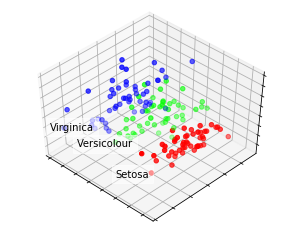

In [5]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
print(X[:5,:])
pca.fit(X)
X = pca.transform(X)
print(X[:5,:])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.brg)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()